In [2]:
from forex import * 
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

C:\Users\atlas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
f = forex("EURUSD")
f.add_senti()

In [4]:
def tbest_action(arr, h_interval= 99, bs_thresh_hold = 5):

    """
    Jeus this took too long. Function to mathamatically guess most optimal 
    buy/sell action at a given point.

    :params

        arr - the array to create the best decisions 

        h_interval - the "granularity" of the derivative. Higher means less resolution, lower means more.

        bs_threah_hold - the decision thresh hold. Higher means less decisions, and lower means more 
    
    :out
        barr - the best decision at given points. 1 = buy, -1 = sell, 0 = none

    """

    if (type(arr) == pd.DataFrame):
        arr = arr.iloc[:,5].to_numpy()
    


    a = 0
    b = len(arr)
    darr = np.zeros(b)
    h = h_interval


    for i in range(0,b,h):
        darr[i] = arr[i]

    for i in range(0,b-h,h):
        toadd = np.linspace(arr[i],arr[i+h],num=h)
        for j in range(0,len(toadd)):
            darr[i+j] = toadd[j]

    s = np.where(darr == 0)[0][0]
    e = b
    t = np.linspace(arr[s],arr[e-1],num=b-s)
    for i in range(s,e):
        darr[i] = t[i-b]


    barr = np.zeros(b)
    lval = bs_thresh_hold

    for i in range(lval,len(darr)-lval):

        if darr[i-lval] < darr[i] and darr[i+lval] < darr[i]:
            barr[i] = -1

        elif darr[i-lval] > darr[i] and darr[i+lval] > darr[i]:
            barr[i] = 1
    del darr
    return barr




qq = tbest_action(a.min,99,999)

plt.plot(qq)

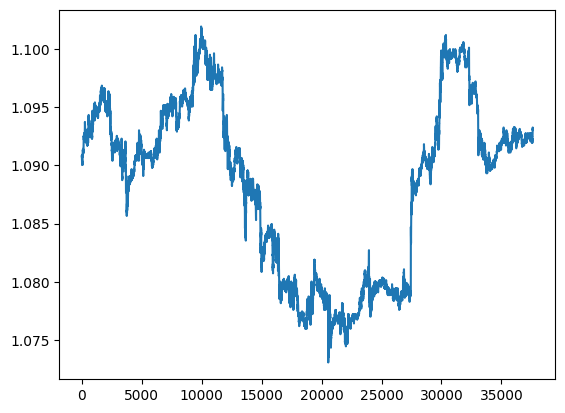

In [11]:
X = f.day.iloc[:,1:]
Y = best_action(f.min,h_interval=999,bs_thresh_hold=6)
plt.plot(f.min.iloc[:,2])

In [6]:
from sklearn.model_selection import train_test_split

from 
